# Importing all the libraries

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]
import seaborn as sns
plt.style.use("classic")

# Getting the data

In [204]:
data = pd.read_csv(r"C:\Users\jaskeerat singh\Desktop\AAPL.csv")

# Check the different information

In [205]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
247,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
248,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
249,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
250,30-12-2019,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [206]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2019,154.889999,158.850006,154.229996,157.919998,154.516388,37039700
1,03-01-2019,143.979996,145.720001,142.000000,142.190002,139.125412,91312200
2,04-01-2019,144.529999,148.550003,143.800003,148.259995,145.064575,58607100
3,07-01-2019,148.699997,148.830002,145.899994,147.929993,144.741714,54777800
4,08-01-2019,149.559998,151.820007,148.520004,150.750000,147.500916,41025300


In [207]:
data.index

RangeIndex(start=0, stop=251, step=1)

In [208]:
data.shape

(251, 7)

In [209]:
data.nunique()

Date         251
Open         246
High         248
Low          249
Close        250
Adj Close    251
Volume       250
dtype: int64

In [210]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [211]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [213]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,207.542151,209.497650,205.939960,207.915737,205.255342,2.804224e+07
std,34.047409,34.143414,33.967037,34.182276,34.592784,1.084423e+07
min,143.979996,145.720001,142.000000,142.190002,139.125412,1.136200e+07
25%,185.035004,187.665001,183.295006,185.919998,183.044487,2.095990e+07
50%,203.119995,204.490005,201.559998,202.899994,200.321732,2.588170e+07
75%,222.534997,224.169999,220.579994,223.339996,221.145821,3.202875e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,9.131220e+07


# Data Analysis

In [214]:
data["Date"] = pd.to_datetime(data["Date"], format = "%d-%m-%Y")
data["month"] = pd.DatetimeIndex(data["Date"]).month

datamonth = data.groupby("month")["Adj Close"].mean().to_frame()
datamonth

,Adj Close
month,
1,150.843483
2,168.558006
3,180.112481
4,197.035945
5,188.428836
6,190.349968
7,202.431111
8,202.738817
9,215.853332


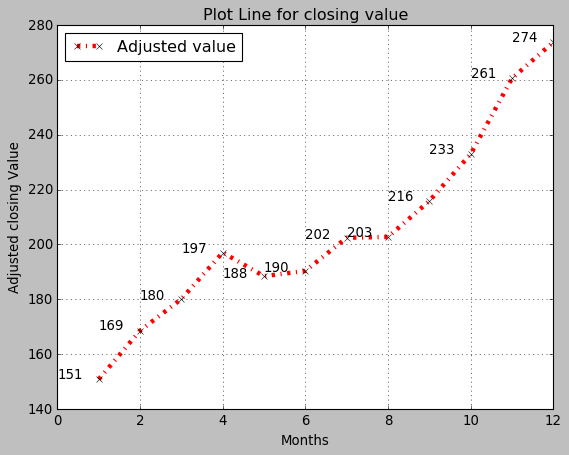

In [221]:
plt.plot(datamonth.index, datamonth["Adj Close"], marker = "x", color = "#ff0000", ls = "-.", lw = 4, label = "Adjusted value", markeredgecolor = "#000000")
plt.title("Plot Line for closing value")
plt.xlabel("Months")
plt.ylabel("Adjusted closing Value")
plt.legend(loc = "upper left")
plt.grid(True)
for index, value in enumerate(datamonth["Adj Close"].round()):
    plt.text(index, value, int(value))
plt.show()

In [216]:
def convert(x):
    month = x
    if(x == 1):
        return "January"
    if(x == 2):
        return "February"
    if(x == 3):
        return "March"
    if(x == 4):
        return "April"
    if(x == 5):
        return "May"
    if(x == 6):
        return "June"
    if(x == 7):
        return "July"
    if(x == 8):
        return "August"
    if(x == 9):
        return "September"
    if(x == 10):
        return "October"
    if(x == 11):
        return "November"
    if(x == 12):
        return "December"
    else:
        return "No month"

data["month"] = data["month"].apply(convert)
datavol = data.groupby("month")["Volume"].sum().to_frame()
datavol

,Volume
month,
April,506117700
August,681074600
December,571997300
February,472540600
January,828087400
July,473957000
June,515187300
March,650981400
May,739456600


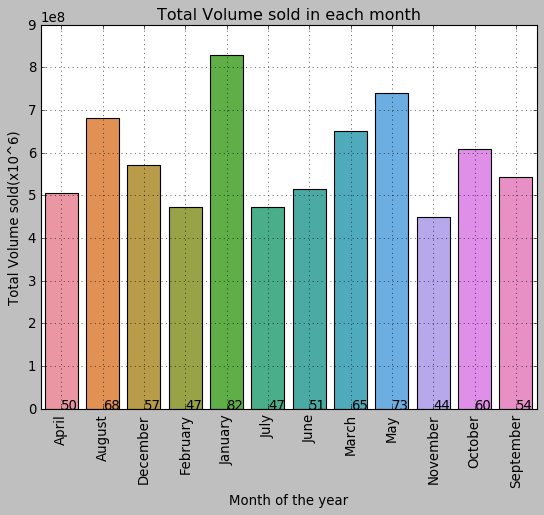

In [217]:
sns.barplot(datavol.index, datavol["Volume"])
plt.xticks(rotation = "vertical")
plt.xlabel("Month of the year")
plt.ylabel("Total Volume sold(x10^6)")
plt.title("Total Volume sold in each month")
plt.grid(True)
for index, value in enumerate(datavol["Volume"]/10000000):
    plt.text(index, value, int(value))
plt.show()

In [218]:
data["For 5 days"] = data["Adj Close"].rolling(5).mean()
data["For 15 days"] = data["Adj Close"].rolling(15).mean()
data["For 30 days"] = data["Adj Close"].rolling(30).mean()
data["For 50 days"] = data["Adj Close"].rolling(50).mean()

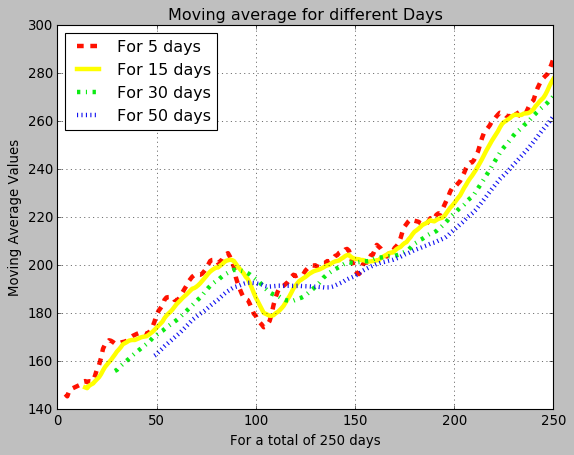

In [222]:
plt.plot(data["For 5 days"], color = "#ff1100", ls = "--", lw = 4, label = "For 5 days")
plt.plot(data["For 15 days"], color = "#ffff00", lw = 4, label = "For 15 days")
plt.plot(data["For 30 days"], color = "#0ceb13", ls = "-.", lw = 4, label = "For 30 days")
plt.plot(data["For 50 days"], color = "#1111f0", ls = ":", lw = 4, label = "For 50 days")
plt.title("Moving average for different Days")
plt.xlabel("For a total of 250 days")
plt.ylabel("Moving Average Values")
plt.grid(True)
plt.legend(loc = "upper left")
plt.show()

In [224]:
data["daily return"] = data["Adj Close"].pct_change()

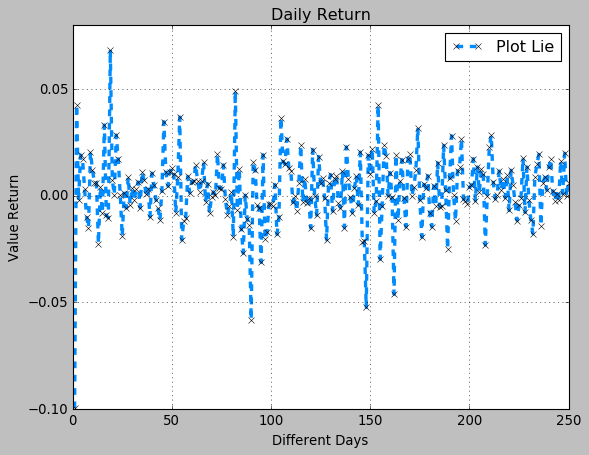

In [229]:
plt.plot(data["daily return"], lw = 3, ls = "--", color = "#008cff", label = "Plot Lie", marker = "x", markeredgecolor = "#000000")
plt.title("Daily Return")
plt.xlabel("Different Days")
plt.ylabel("Value Return")
plt.grid(True)
plt.legend()
plt.show()

Text(0.5, 1.0, 'KDE plot of Daily return')

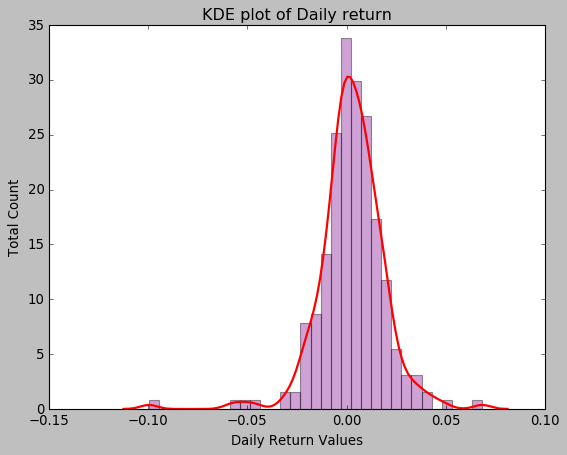

In [240]:
sns.distplot(data["daily return"], color = "#871596", kde_kws={ "lw" : 2, "color": "r"})
plt.xlabel("Daily Return Values")
plt.ylabel("Total Count")
plt.title("KDE plot of Daily return")

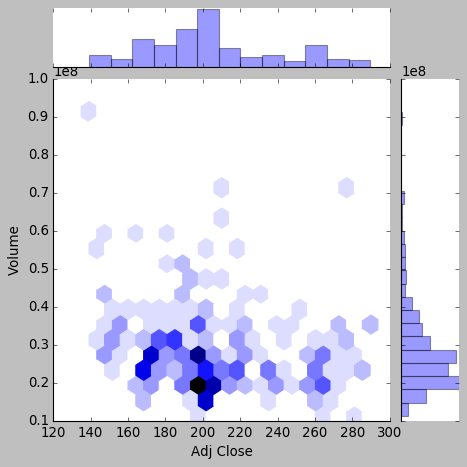

In [244]:
sns.jointplot(data["Adj Close"], data["Volume"], kind = "hex")
plt.show()

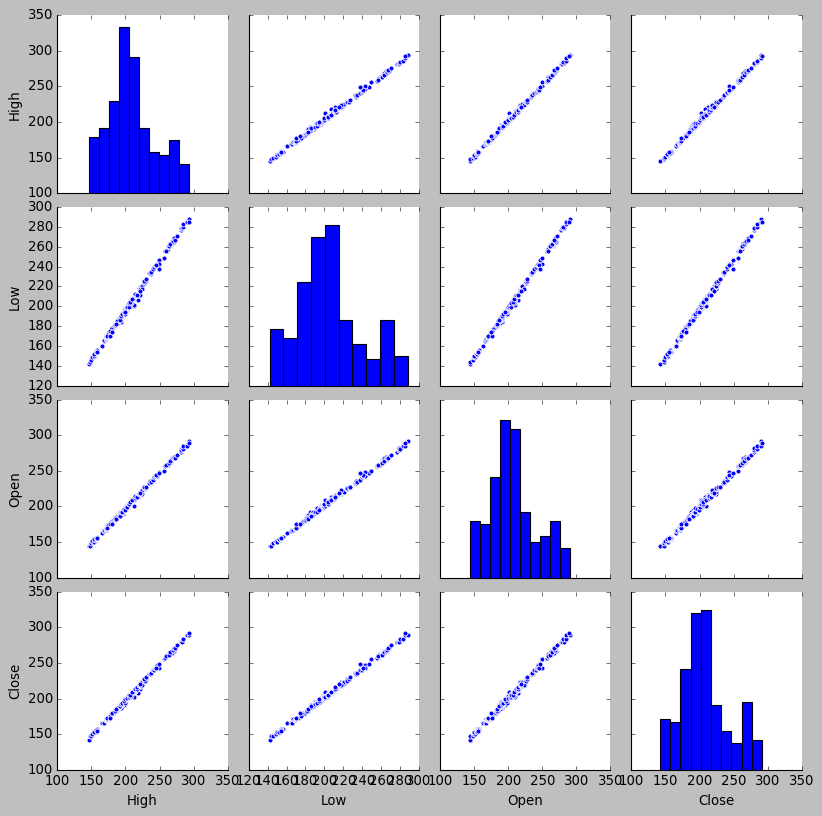

In [248]:
sns.pairplot(data[["High","Low","Open","Close"]])